# Imports

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.container { margin-left:17% !important; }</style>"))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# set plot style if no arguments provided
jtplot.style(theme='monokai')

# Data for regression model

In [10]:
df = pd.read_csv('data/Boston_Latest_Files/multi-stage/used for regression.csv')
print(df.shape)
df.head()

(221, 22)


,cleaned_street_address,Star Rating,Energy Star,LEED Certified,Building Class,Building Status,RBA,Total Available Space (SF),Rent/SF/Yr,Percent Leased,Year Built,Typical Floor Size,Parking Ratio,Tenancy,Number Of Stories,Direct Available Space,Direct Vacant Space,Land Area (AC),Land Area (SF),Max Building Contiguous Space,Number Of Parking Spaces,Cluster
0,75 STATE STREET,5,NaN,LEED Interiors - Platinum,A,Existing,840855,102505.0,54.0,97.77,1987.0,26234,0.80,Multi,31,59031.0,18778,1.43,62291.0,40253.0,676.0,Cluster 1
1,40 BROAD STREET,4,Energy Star,NaN,B,Existing,267665,154796.0,42.6,90.09,1923.0,22305,NaN,Multi,11,154796.0,26534,0.61,26572.0,101486.0,NaN,Cluster 1
2,200 EXCHANGE STREET,3,NaN,NaN,A,Under Renovation,314176,236378.0,25.7,24.76,1983.0,81062,0.06,Multi,4,236378.0,236378,2.39,104108.0,157078.0,300.0,Cluster 0
3,800 BOYLSTON STREET,5,NaN,LEED Interiors - Certified,A,Existing,1235538,69259.0,67.0,97.46,1965.0,27000,0.50,Multi,52,31423.0,31423,17.79,774932.0,14075.0,2550.0,Cluster 3
4,1 BROADWAY,4,Energy Star,LEED Interiors - Silver,A,Existing,312000,9100.0,50.0,97.08,1969.0,50032,1.00,Multi,16,9100.0,9100,2.30,100188.0,6100.0,510.0,Cluster 2


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
df_dummies = pd.concat([df['cleaned_street_address'], pd.get_dummies(df.drop('cleaned_street_address',axis=1))],axis=1)
df_dummies.head()

,cleaned_street_address,Star Rating,RBA,Total Available Space (SF),Rent/SF/Yr,Percent Leased,Year Built,Typical Floor Size,Parking Ratio,Number Of Stories,Direct Available Space,Direct Vacant Space,Land Area (AC),Land Area (SF),Max Building Contiguous Space,Number Of Parking Spaces,Energy Star_Energy Star,LEED Certified_LEED Interiors - Certified,LEED Certified_LEED Interiors - Gold,LEED Certified_LEED Interiors - Platinum,LEED Certified_LEED Interiors - Silver,Building Class_A,Building Class_B,Building Class_C,Building Status_Existing,Building Status_Proposed,Building Status_Under Construction,Building Status_Under Renovation,Tenancy_Multi,Tenancy_Single,Cluster_Cluster 0,Cluster_Cluster 1,Cluster_Cluster 2,Cluster_Cluster 3,Cluster_Cluster 4
0,75 STATE STREET,5,840855,102505.0,54.0,97.77,1987.0,26234,0.80,31,59031.0,18778,1.43,62291.0,40253.0,676.0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,40 BROAD STREET,4,267665,154796.0,42.6,90.09,1923.0,22305,NaN,11,154796.0,26534,0.61,26572.0,101486.0,NaN,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,200 EXCHANGE STREET,3,314176,236378.0,25.7,24.76,1983.0,81062,0.06,4,236378.0,236378,2.39,104108.0,157078.0,300.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
3,800 BOYLSTON STREET,5,1235538,69259.0,67.0,97.46,1965.0,27000,0.50,52,31423.0,31423,17.79,774932.0,14075.0,2550.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1 BROADWAY,4,312000,9100.0,50.0,97.08,1969.0,50032,1.00,16,9100.0,9100,2.30,100188.0,6100.0,510.0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [72]:
# can change this approach
# I'm so sorry for my dataframe names
df_dummies_nan_code_zero = df_dummies.fillna(0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(\
                                        df_dummies_nan_code_zero.drop(['cleaned_street_address','Rent/SF/Yr'],axis=1),
                                                    df_dummies_nan_code_zero['Rent/SF/Yr'], test_size=0.2, random_state=117)

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, df_dummies_nan_code_zero.drop(['cleaned_street_address','Rent/SF/Yr'],axis=1).columns, columns=['Coefficient'])  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.107872435397097
Mean Squared Error: 161.17119260067966
Root Mean Squared Error: 12.695321681654217


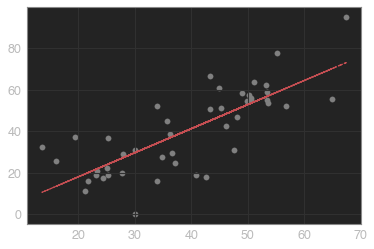

In [63]:
plt.scatter(y_pred, y_test,  color='gray')
# plt.plot(y_test, y_pred, color='red', linewidth=2)
z = np.polyfit(y_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(y_pred,p(y_pred),"r--")
plt.show()

In [66]:
import shap
shap.initjs()

In [68]:
# Single row explanation
explainer = shap.LinearExplainer(regressor,X_train)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

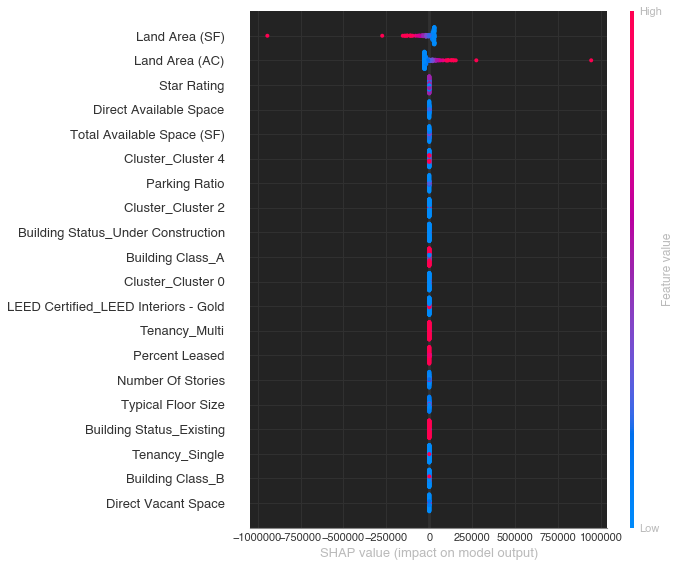

In [69]:
shap.summary_plot(shap_values, X_train)

## Model V2 --> Scaling all numeric columns

In [71]:
from sklearn import preprocessing

In [107]:
# scale everything (what happens if I scale) a boolean column?
base_df = pd.read_csv('data/Boston_Latest_Files/multi-stage/costar_zero_imputed_df_for_stage2.csv')
not_to_scale = ['cleaned_street_address','Rent/SF/Yr','LEED Certified_LEED Interiors - Certified',
       'LEED Certified_LEED Interiors - Gold',
       'LEED Certified_LEED Interiors - Platinum',
       'LEED Certified_LEED Interiors - Silver', 'Building Class_A',
       'Building Class_B', 'Building Class_C', 'Building Status_Existing',
       'Building Status_Proposed', 'Building Status_Under Construction',
       'Building Status_Under Renovation', 'Tenancy_Multi', 'Tenancy_Single',
       'Cluster_Cluster 0', 'Cluster_Cluster 1', 'Cluster_Cluster 2',
       'Cluster_Cluster 3', 'Cluster_Cluster 4']
for col in base_df.drop(not_to_scale,axis=1):
    base_df[col] = preprocessing.scale(base_df[col])

In [108]:
base_df.head()

,cleaned_street_address,Star Rating,RBA,Total Available Space (SF),Rent/SF/Yr,Percent Leased,Year Built,Typical Floor Size,Parking Ratio,Number Of Stories,Direct Available Space,Direct Vacant Space,Land Area (AC),Land Area (SF),Max Building Contiguous Space,Number Of Parking Spaces,Energy Star_Energy Star,LEED Certified_LEED Interiors - Certified,LEED Certified_LEED Interiors - Gold,LEED Certified_LEED Interiors - Platinum,LEED Certified_LEED Interiors - Silver,Building Class_A,Building Class_B,Building Class_C,Building Status_Existing,Building Status_Proposed,Building Status_Under Construction,Building Status_Under Renovation,Tenancy_Multi,Tenancy_Single,Cluster_Cluster 0,Cluster_Cluster 1,Cluster_Cluster 2,Cluster_Cluster 3,Cluster_Cluster 4
0,75 STATE STREET,1.673919,1.598049,0.004801,54.0,0.499160,0.157271,-0.615135,-0.520259,1.695775,-0.199800,-0.273737,-0.326934,-0.326933,-0.273934,0.240315,-0.533745,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,40 BROAD STREET,0.211721,-0.545444,0.383638,42.6,0.205559,-0.306250,-0.715685,-1.011878,-0.123037,0.518992,-0.186992,-0.352985,-0.352984,0.175644,-0.692424,1.873554,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,200 EXCHANGE STREET,-1.250477,-0.371512,0.974683,25.7,-2.291956,0.128301,0.788011,-0.975007,-0.759622,1.131330,2.159932,-0.296434,-0.296434,0.583805,-0.278487,-0.533745,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
3,800 BOYLSTON STREET,1.673919,3.073999,-0.236060,67.0,0.487308,-0.002065,-0.595531,-0.704617,3.605527,-0.407020,-0.132313,0.192824,0.192824,-0.466135,2.826044,-0.533745,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1 BROADWAY,0.211721,-0.379649,-0.671899,50.0,0.472781,0.026905,-0.006102,-0.397355,0.331666,-0.574572,-0.381977,-0.299294,-0.299293,-0.524688,0.011269,1.873554,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(\
                                        base_df.drop(['cleaned_street_address','Rent/SF/Yr','Land Area (SF)','Land Area (AC)'],axis=1),
                                                    base_df['Rent/SF/Yr'], test_size=0.2, random_state=117)

### Scaled Model

In [83]:
linreg_scaled = LinearRegression()  
linreg_scaled.fit(X_train, y_train)
coeff_df = pd.DataFrame(linreg_scaled.coef_, base_df.drop(['cleaned_street_address','Rent/SF/Yr','Land Area (SF)','Land Area (AC)'],axis=1).columns, columns=['Coefficient'])  
y_pred = linreg_scaled.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.230920777830743
Mean Squared Error: 164.18316211635917
Root Mean Squared Error: 12.813397758454203


### SHAP for scaled model

/Users/williamcosby/SparkBeyond/VirtualEnvironments/investa_sb127/lib/python3.7/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


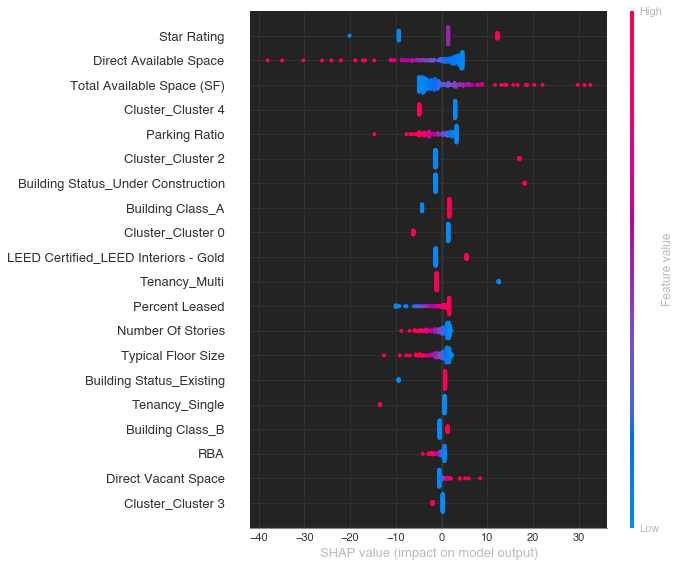

In [84]:
explainer = shap.LinearExplainer(linreg_scaled,X_train)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train)

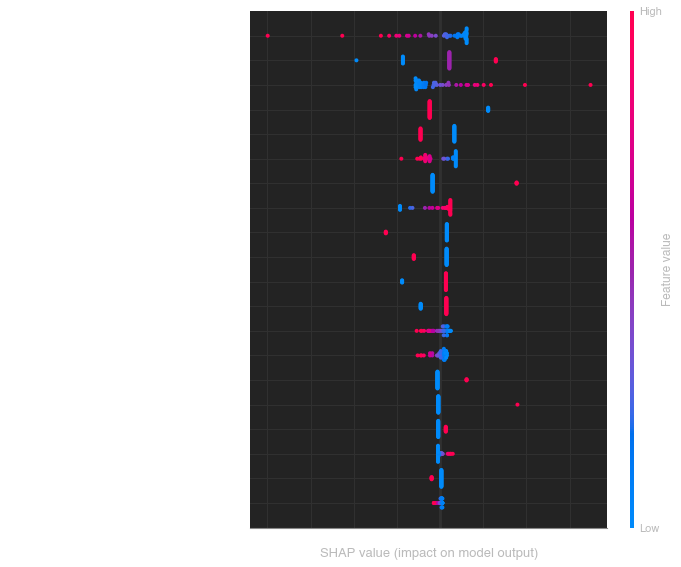

In [100]:
explainer = shap.LinearExplainer(linreg_scaled,X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,axis_color='white')

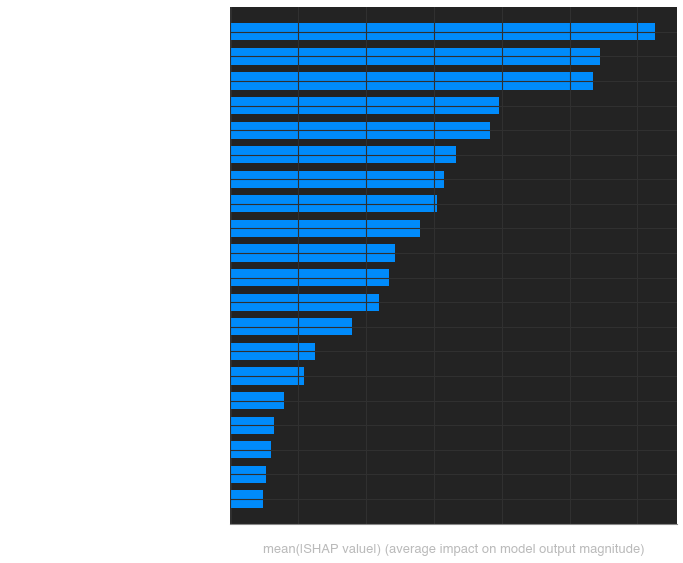

In [99]:
shap.summary_plot(shap_values, X_test,plot_type='bar',axis_color='white')

In [102]:
i=0
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

In [93]:
i=1
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

In [94]:
i=2
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

In [95]:
i=3
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

In [96]:
i=4
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

In [97]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

# Enrich for Additional SB Features
Bringing the SB Features into the standard linear model to see the improvement in performance from this baseline version (which is osm + property features + caprate etc..)

#### Generate the matching datasets

In [118]:
# base data set is the costar_clean
base_df = pd.read_csv('data/Boston_Latest_Files/multi-stage/base_df_scaled_for_stage2.csv')
enriched = pd.read_csv('data/Boston_Latest_Files/multi-stage/da_features_Boston_July_14_rev39.csv.gz')
boston_clean = pd.read_csv('data/Boston_Latest_Files/Costar_Clean.csv')

enriched['da_match_address'] = enriched['da_match_address'].apply(lambda val: val.replace('StreetAddressIdId(','').replace(')',''))

enriched = enriched.drop('error',axis=1).merge(boston_clean[['da_match_address','cleaned_street_address']],how='inner',on='da_match_address')

In [120]:
# merge back into base_df (inner join)
augmented_base_df = base_df.merge(enriched.drop('da_match_address',axis=1),how='inner',on='cleaned_street_address')

In [121]:
augmented_base_df.head()

,cleaned_street_address,Star Rating,RBA,Total Available Space (SF),Rent/SF/Yr,Percent Leased,Year Built,Typical Floor Size,Parking Ratio,Number Of Stories,Direct Available Space,Direct Vacant Space,Land Area (AC),Land Area (SF),Max Building Contiguous Space,Number Of Parking Spaces,Energy Star_Energy Star,LEED Certified_LEED Interiors - Certified,LEED Certified_LEED Interiors - Gold,LEED Certified_LEED Interiors - Platinum,LEED Certified_LEED Interiors - Silver,Building Class_A,Building Class_B,Building Class_C,Building Status_Existing,Building Status_Proposed,Building Status_Under Construction,Building Status_Under Renovation,Tenancy_Multi,Tenancy_Single,Cluster_Cluster 0,Cluster_Cluster 1,Cluster_Cluster 2,Cluster_Cluster 3,Cluster_Cluster 4,"stemmedWordsWithoutCommonTerms(comments of da_match_address) contains ""bar""","distanceToW2VCluster(description of da_match_address, Cluster #16 (officescoo, cafe, mezzanine, gym, lounge, barbershop, fitness, business, fitup, bakery), comments_w2v_of(comments))","skipgrams(comments of da_match_address) contains (""lighting"", ""*"", ""mechanical"")","comments of da_match_address does not contain ""renovations""","comments of da_match_address contains ""plaza""","distanceToW2VCluster(description of da_match_address, Cluster #2 (flange, blower, lon, sweep, q, equal, shakes, weatherstrip), comments_w2v_of(comments))"
0,75 STATE STREET,1.673919,1.598049,0.004801,54.0,0.499160,0.157271,-0.615135,-0.520259,1.695775,-0.199800,-0.273737,-0.326934,-0.326933,-0.273934,0.240315,-0.533745,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1.0,2.081279,0.0,0.0,0.0,4.366986
1,40 BROAD STREET,0.211721,-0.545444,0.383638,42.6,0.205559,-0.306250,-0.715685,-1.011878,-0.123037,0.518992,-0.186992,-0.352985,-0.352984,0.175644,-0.692424,1.873554,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1.0,2.063163,0.0,0.0,0.0,4.365127
2,800 BOYLSTON STREET,1.673919,3.073999,-0.236060,67.0,0.487308,-0.002065,-0.595531,-0.704617,3.605527,-0.407020,-0.132313,0.192824,0.192824,-0.466135,2.826044,-0.533745,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1.0,2.042618,0.0,0.0,1.0,4.319767
3,18 CHESTNUT STREET,-1.250477,-0.363943,1.552977,11.0,-2.473927,-0.313493,0.331914,-0.809086,-0.668681,1.730457,2.345387,-0.273878,-0.273877,-0.105162,-0.547546,-0.533745,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0.0,2.430312,0.0,1.0,0.0,4.263830
4,1 FEDERAL STREET,0.211721,2.644093,0.388920,49.0,0.498395,0.077603,-0.646715,-0.876683,2.332359,-0.026777,-0.202057,-0.331064,-0.331063,-0.255329,-0.361274,-0.533745,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1.0,2.079929,0.0,0.0,0.0,4.372160


### Include SB features in modeling

In [135]:
sb_cols_to_scale = ['distanceToW2VCluster(description of da_match_address, Cluster #16 (officescoo, cafe, mezzanine, gym, lounge, barbershop, fitness, business, fitup, bakery), comments_w2v_of(comments))',
                   'distanceToW2VCluster(description of da_match_address, Cluster #2 (flange, blower, lon, sweep, q, equal, shakes, weatherstrip), comments_w2v_of(comments))']
for col in sb_cols_to_scale:
    augmented_base_df[col] = preprocessing.scale(augmented_base_df[col])
    
augmented_base_df = augmented_base_df.rename(columns={sb_cols_to_scale[0]: 'DA_w2v_proximity_to_amenities_clusters',
                                                     sb_cols_to_scale[1]: 'DA_w2v_proximity_to_something_maintenance'})

In [136]:
cols_to_drop = ['cleaned_street_address','Rent/SF/Yr','Land Area (SF)','Land Area (AC)']
# cols_to_drop.extend(enriched.drop(['da_match_address','cleaned_street_address'],axis=1).columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(\
                                        augmented_base_df.drop(cols_to_drop,axis=1),
                                                    augmented_base_df['Rent/SF/Yr'], test_size=0.05, random_state=117)

linreg_scaled = LinearRegression()  
linreg_scaled.fit(X_train, y_train)
coeff_df = pd.DataFrame(linreg_scaled.coef_, augmented_base_df.drop(cols_to_drop,axis=1).columns, columns=['Coefficient'])  
y_pred = linreg_scaled.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.607383147344722
Mean Squared Error: 201.71199573279426
Root Mean Squared Error: 14.202534834767851


/Users/williamcosby/SparkBeyond/VirtualEnvironments/investa_sb127/lib/python3.7/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


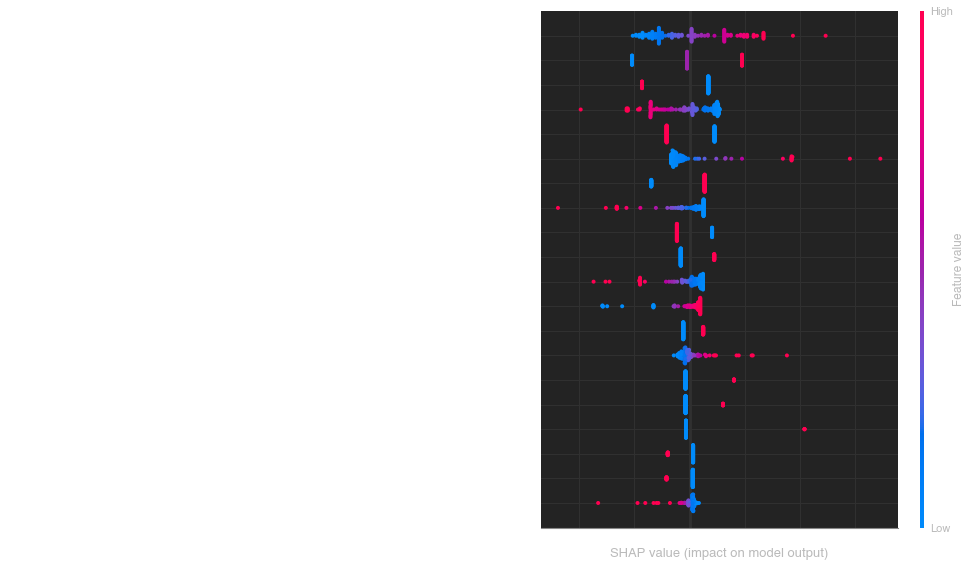

In [137]:
explainer = shap.LinearExplainer(linreg_scaled,X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train,axis_color='white')

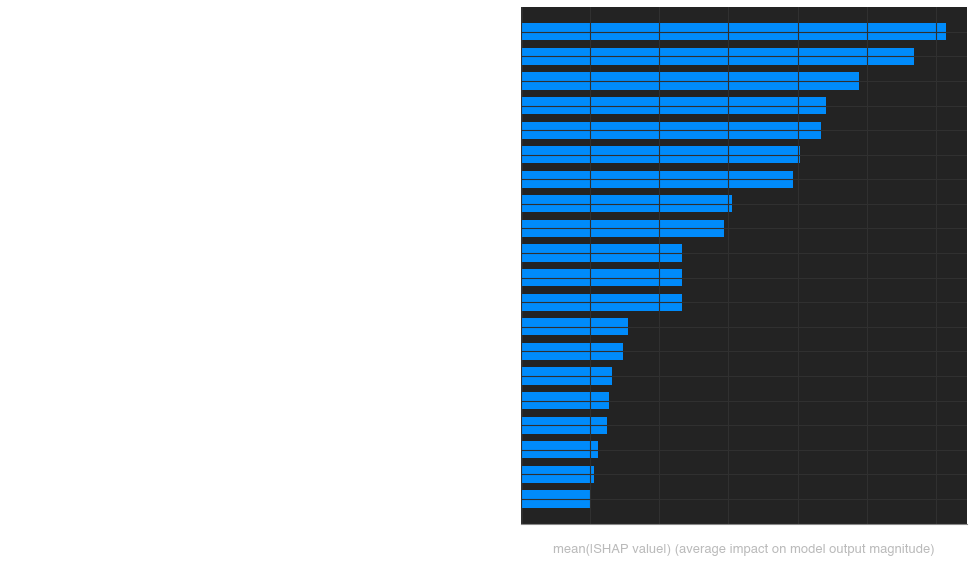

In [139]:
explainer = shap.LinearExplainer(linreg_scaled,X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train,axis_color='white',plot_type='bar')

## Comparison model dropping the SB Features

In [127]:
enriched.head(1)

,da_match_address,"stemmedWordsWithoutCommonTerms(comments of da_match_address) contains ""bar""","distanceToW2VCluster(description of da_match_address, Cluster #16 (officescoo, cafe, mezzanine, gym, lounge, barbershop, fitness, business, fitup, bakery), comments_w2v_of(comments))","skipgrams(comments of da_match_address) contains (""lighting"", ""*"", ""mechanical"")","comments of da_match_address does not contain ""renovations""","comments of da_match_address contains ""plaza""","distanceToW2VCluster(description of da_match_address, Cluster #2 (flange, blower, lon, sweep, q, equal, shakes, weatherstrip), comments_w2v_of(comments))",cleaned_street_address
0,75 STATE STREET,1.0,2.081279,0.0,0.0,0.0,4.366986,75 STATE STREET


In [128]:
cols_to_drop = ['cleaned_street_address','Rent/SF/Yr','Land Area (SF)','Land Area (AC)']
cols_to_drop.extend(enriched.drop(['da_match_address','cleaned_street_address'],axis=1).columns.tolist())

In [131]:
X_train, X_test, y_train, y_test = train_test_split(\
                                        augmented_base_df.drop(cols_to_drop,axis=1),
                                                    augmented_base_df['Rent/SF/Yr'], test_size=0.05, random_state=117)

linreg_scaled = LinearRegression()  
linreg_scaled.fit(X_train, y_train)
coeff_df = pd.DataFrame(linreg_scaled.coef_, augmented_base_df.drop(cols_to_drop,axis=1).columns, columns=['Coefficient'])  
y_pred = linreg_scaled.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.187685074514627
Mean Squared Error: 388.07516026254393
Root Mean Squared Error: 19.69962335331678


/Users/williamcosby/SparkBeyond/VirtualEnvironments/investa_sb127/lib/python3.7/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


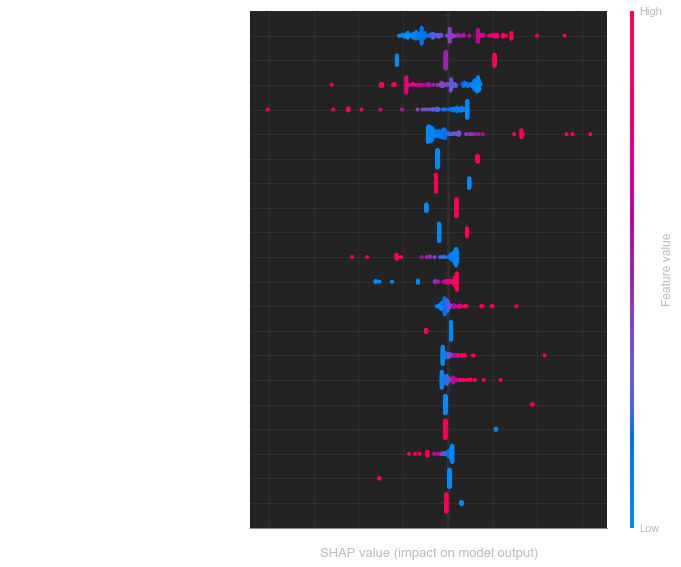

In [132]:
explainer = shap.LinearExplainer(linreg_scaled,X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train,axis_color='white')

# All modeling in this notebook stops here

# Misc code for generating error target variable

## predictions for full datasets

In [53]:
df_dummies_nan_code_zero['prediction'] = regressor.predict(df_dummies_nan_code_zero.drop(['cleaned_street_address','Rent/SF/Yr'],axis=1))

In [54]:
df_dummies_nan_code_zero[['Rent/SF/Yr','prediction']].head()

,Rent/SF/Yr,prediction
0,54.0,59.688283
1,42.6,46.159392
2,25.7,16.151368
3,67.0,53.097598
4,50.0,65.488051


## Calculating error metric

In [55]:
stage3_df = df_dummies_nan_code_zero.copy(deep=True)

In [56]:
stage3_df['error'] = stage3_df['Rent/SF/Yr'] - stage3_df['prediction']

In [57]:
stage3_df.to_csv('data/Boston_Latest_Files/multi-stage/prediction_errors_simplemodel.csv',index=False)

In [58]:
stage3_df.head()

,cleaned_street_address,Star Rating,RBA,Total Available Space (SF),Rent/SF/Yr,Percent Leased,Year Built,Typical Floor Size,Parking Ratio,Number Of Stories,Direct Available Space,Direct Vacant Space,Land Area (AC),Land Area (SF),Max Building Contiguous Space,Number Of Parking Spaces,Energy Star_Energy Star,LEED Certified_LEED Interiors - Certified,LEED Certified_LEED Interiors - Gold,LEED Certified_LEED Interiors - Platinum,LEED Certified_LEED Interiors - Silver,Building Class_A,Building Class_B,Building Class_C,Building Status_Existing,Building Status_Proposed,Building Status_Under Construction,Building Status_Under Renovation,Tenancy_Multi,Tenancy_Single,Cluster_Cluster 0,Cluster_Cluster 1,Cluster_Cluster 2,Cluster_Cluster 3,Cluster_Cluster 4,prediction,error
0,75 STATE STREET,5,840855,102505.0,54.0,97.77,1987.0,26234,0.80,31,59031.0,18778,1.43,62291.0,40253.0,676.0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,59.688283,-5.688283
1,40 BROAD STREET,4,267665,154796.0,42.6,90.09,1923.0,22305,0.00,11,154796.0,26534,0.61,26572.0,101486.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,46.159392,-3.559392
2,200 EXCHANGE STREET,3,314176,236378.0,25.7,24.76,1983.0,81062,0.06,4,236378.0,236378,2.39,104108.0,157078.0,300.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,16.151368,9.548632
3,800 BOYLSTON STREET,5,1235538,69259.0,67.0,97.46,1965.0,27000,0.50,52,31423.0,31423,17.79,774932.0,14075.0,2550.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,53.097598,13.902402
4,1 BROADWAY,4,312000,9100.0,50.0,97.08,1969.0,50032,1.00,16,9100.0,9100,2.30,100188.0,6100.0,510.0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,65.488051,-15.488051


## Map Predictions back into cleaned dataset

In [59]:
bost_clean = pd.read_csv('data/Boston_Latest_Files/Costar_Clean.csv')
bost_clean.head()

,address,Property Name,PropertyType,Star Rating,Energy Star,LEED Certified,Building Class,Building Status,RBA,Total Available Space (SF),Rent/SF/Yr,Secondary Type,Submarket Name,Leasing Company Name,Leasing Company Contact,Submarket Cluster,City,State,Zip,County Name,Sale Company Name,Sale Company Contact,For Sale Price,For Sale Status,Percent Leased,Year Built,Year Renovated,Typical Floor Size,Parking Ratio,Tenancy,Number Of Stories,Amenities,Architect Name,Average Weighted Rent,Avg Rent-Direct (Office),Avg Rent-Sublet (Office),Building Operating Expenses,Building Park,Building Tax Expenses,Developer Name,Direct Available Space,Direct Services,Direct Vacant Space,Land Area (AC),Land Area (SF),Leasing Company Address,Leasing Company City State Zip,Leasing Company Fax,Leasing Company Phone,Max Building Contiguous Space,Max Floor Contiguous Space,Number Of Parking Spaces,Owner Name,Property Manager Name,PropertyID,Sale Company Address,Sale Company City State Zip,Sale Company Fax,Sale Company Phone,Sales Company,Sales Contact,Sales Contact Phone,Sublet Available Space,Sublet Services,Sublet Vacant Space,Lat,Lon,street_address,cleaned_street_address,has_da_match,da_match_address
0,75 State St,NaN,Office,5,NaN,LEED Interiors - Platinum,A,Existing,840855,102505.0,54.0,NaN,Financial District,Cushman & Wakefield,Tom Ashe,Boston/Suffolk County,Boston,MA,02109-1827,Suffolk,NaN,NaN,NaN,N,97.77,1987.0,NaN,26234.0,0.80,Multi,31.0,"Atrium, Banking, Fitness Center, Food Service,...",Gund Partnership,-,NaN,NaN,2014 Tax @ $10.09/sf,NaN,2014 Tax @ $10.09/sf,Beacon Properties,59031.0,NaN,18778,1.43,62291.0,225 Franklin St Suite # 300,"Boston, MA 021102804",6.173309e+09,6.172044e+09,40253.0,40253.0,676.0,Rockpoint Group LLC,"Brookfield Office Properties, Inc.",41744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,NaN,3500,42.358585,-71.054988,75 State St,75 STATE STREET,75 STATE STREET,75 STATE STREET
1,40 Broad St,Insurance Exchange Bldg,Office,4,Energy Star,NaN,B,Existing,267665,154796.0,42.6,NaN,Financial District,JLL,Brad McGill,Boston/Suffolk County,Boston,MA,02109-4316,Suffolk,NaN,NaN,NaN,N,90.09,1923.0,2003.0,22305.0,NaN,Multi,11.0,Energy Star Labeled,Shepley Bulfinch,-,NaN,NaN,2019 Tax @ $9.16/sf,NaN,2019 Tax @ $9.16/sf,Leggat McCall Properties LLC,154796.0,NaN,26534,0.61,26572.0,One Post Office Sq Suite # 2600,"Boston, MA 02109",6.175314e+09,6.175314e+09,101486.0,26776.0,NaN,"Invesco Advisers, Inc.",Lincoln Property Company,222192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,42.358465,-71.054002,40 Broad St,40 BROAD STREET,36-44 BROAD STREET,36-44 BROAD STREET
2,200 Exchange St,Exchange 200,Office,3,NaN,NaN,A,Under Renovation,314176,236378.0,25.7,NaN,Medford/Malden,JLL,Molly Heath,Close-In Suburbs North,Malden,MA,02148-5514,Middlesex,NaN,NaN,NaN,N,24.76,1983.0,2020.0,81062.0,0.06,Multi,4.0,"Conferencing Facility, Fitness Center, Restaur...",NaN,-,NaN,NaN,2020 Tax @ $1.56/sf,NaN,2020 Tax @ $1.56/sf,NaN,236378.0,NaN,236378,2.39,104108.0,One Post Office Sq Suite # 2600,"Boston, MA 02109",6.175314e+09,6.173166e+09,157078.0,78539.0,300.0,"Berkeley Investments, Inc.",NaN,217618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,42.425992,-71.072827,200 Exchange St,200 EXCHANGE STREET,No Match,No Match
3,800 Boylston St,NaN,Office,5,NaN,LEED Interiors - Certified,A,Existing,1235538,69259.0,67.0,NaN,Back Bay,"Boston Properties, Inc.",Patrick Mulvihill,Boston/Suffolk County,Boston,MA,02199-8001,Suffolk,NaN,NaN,NaN,N,97.46,1965.0,2017.0,27000.0,0.50,Multi,52.0,"24 Hour Access, Atrium, Banking, Controlled Ac...",Charles Luckman Associates,67,NaN,67.0,2012 Tax @ $18.81/sf,Prudential Center,2012 Tax @ $18.81/sf,Prudential Financial,31423.0,NaN,31423,17.79,774932.0,800 Boylston St Suite # 1900,"Boston, MA 021998001",6.172363e+09,6.172364e+09,14075.0,14075.0,2550.0,"Boston Properties, Inc.","Boston Properties, Inc.",222077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32836.0,Full Service Gross,9887,42.347391,-71.082028,800 Boylston St,800 BOYLSTON STREET,800 BOYLSTON STREET,800 BOYLSTON STREET
4,1 Bro

In [60]:
bost_clean_with_preds = bost_clean.merge(stage3_df[['cleaned_street_address','prediction','error']],
                                        how='left', on='cleaned_street_address')